In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score

In [11]:
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV

In [12]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix , plot_confusion_matrix 
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve, roc_auc_score 

In [401]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score ,matthews_corrcoef

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [16]:
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/weatherAUS.csv')

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
df.shape

(145460, 23)

In [19]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [20]:
(df.isnull().sum()/len(df))*100
# Percentage of null values present in each columns

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [21]:
drop_columns = []

for column in df.columns:
    if (df[column].isnull().sum()/len(df))*100 > 30:
        drop_columns.append(column)

In [22]:
drop_columns

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [23]:
data1 = df.drop( drop_columns ,axis=1)

In [24]:
data1.shape

(145460, 19)

In [25]:
data1.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [26]:
data1.dropna(axis=0 , subset=['RainTomorrow'] , inplace=True)

In [27]:
data1.shape

(142193, 19)

In [28]:
data1.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [29]:
i=0
list10=[]
list9=[]
list8=[]
list7=[]
list6=[]

while i<len(df):
    try:
        sum_of_null_values = data1.loc[[i]].isna().sum().sum()
        
        if sum_of_null_values  > 5:
        
            if sum_of_null_values >=10:
                list10.append(i)
            elif sum_of_null_values == 9:
                list9.append(i)
            elif sum_of_null_values == 8:
                list8.append(i)
            elif sum_of_null_values == 7:
                list7.append(i)
            elif sum_of_null_values == 6:
                list6.append(i)
            
    except: pass
    
    i=i+1

In [30]:
len(list10)

330

In [31]:
len(list9)

401

In [32]:
data1.shape

(142193, 19)

In [33]:
for i in [list10,list9]:
    data1.drop(i , axis=0 , inplace=True)

In [34]:
data1.shape

(141462, 19)

In [35]:
data1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [36]:
data1.isnull().sum()

Date                 0
Location             0
MinTemp            301
MaxTemp            190
Rainfall          1276
WindGustDir       8670
WindGustSpeed     8610
WindDir9am        9351
WindDir3pm        3135
WindSpeed9am       998
WindSpeed3pm      1997
Humidity9am       1428
Humidity3pm       2986
Pressure9am      13322
Pressure3pm      13295
Temp9am            572
Temp3pm           2109
RainToday         1276
RainTomorrow         0
dtype: int64

In [37]:
data1.isnull().sum()

Date                 0
Location             0
MinTemp            301
MaxTemp            190
Rainfall          1276
WindGustDir       8670
WindGustSpeed     8610
WindDir9am        9351
WindDir3pm        3135
WindSpeed9am       998
WindSpeed3pm      1997
Humidity9am       1428
Humidity3pm       2986
Pressure9am      13322
Pressure3pm      13295
Temp9am            572
Temp3pm           2109
RainToday         1276
RainTomorrow         0
dtype: int64

In [38]:
s = data1.loc[data1['RainToday'].isnull()]
s.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,17.3,26.2,NaN,No
284,2009-09-11,Albury,NaN,18.8,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,23.4,26.4,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,21.0,30.0,NaN,No


In [39]:
data1['RainTomorrow'] = np.where(data1['RainTomorrow']=='No' , 0 ,1)

In [40]:
x = data1.drop('RainTomorrow',axis=1)
y= data1['RainTomorrow']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=0 ,stratify=y)

In [42]:
x_train.isnull().sum()

Date                 0
Location             0
MinTemp            234
MaxTemp            158
Rainfall          1023
WindGustDir       6902
WindGustSpeed     6853
WindDir9am        7501
WindDir3pm        2508
WindSpeed9am       805
WindSpeed3pm      1587
Humidity9am       1137
Humidity3pm       2373
Pressure9am      10667
Pressure3pm      10643
Temp9am            473
Temp3pm           1682
RainToday         1023
dtype: int64

In [43]:
x_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
83344,2015-09-02,Dartmoor,4.6,12.5,0.0,NNE,37.0,N,NE,13.0,11.0,NaN,NaN,1008.0,1005.1,10.9,10.4,No
10185,2012-03-03,CoffsHarbour,19.0,22.8,20.8,SE,39.0,SW,W,13.0,9.0,96.0,92.0,1019.0,1017.0,19.3,21.0,Yes
34777,2012-07-11,SydneyAirport,10.4,20.8,8.2,WNW,41.0,NNW,N,19.0,22.0,67.0,39.0,1019.9,1017.4,15.0,20.5,Yes
57070,2014-07-20,Ballarat,2.3,10.2,0.0,SSE,24.0,SSE,S,11.0,11.0,100.0,73.0,1028.7,1026.8,6.4,9.7,No
140866,2013-07-19,Darwin,18.9,32.0,0.0,N,35.0,E,N,17.0,24.0,73.0,57.0,1013.1,1009.2,24.9,29.0,No


In [44]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [45]:
for i in ['WindGustDir','WindDir9am','WindDir3pm']:
    impute_nan(x_train,i)
    x_train.drop(i,axis=1,inplace=True)

In [46]:
x_train.isnull().sum()

Date                      0
Location                  0
MinTemp                 234
MaxTemp                 158
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                 473
Temp3pm                1682
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
dtype: int64

In [47]:
x_train.shape

(113169, 18)

In [48]:
def highest_corr(df,column_name):

    for i in df.columns:
        try:
            corr = df[column_name].corr(df[i])
            print('correlation between ', column_name ,'and ',i,' is ',corr)
        except:pass

In [49]:
x_train['MinTemp'].describe()

count    112935.000000
mean         12.185188
std           6.397735
min          -8.200000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [50]:
# highest_corr(x_train,'MinTemp')

In [51]:
# highest_corr(x_train,'MaxTemp')

In [52]:
for i in ['MinTemp','MaxTemp']:
    impute_nan(x_train,i)
    x_train.drop(i,axis=1,inplace=True)

In [53]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                 473
Temp3pm                1682
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [54]:
# highest_corr(x_train,'MinTemp_random')

In [55]:
# highest_corr(x_train,'MaxTemp_random')

In [56]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                 473
Temp3pm                1682
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [57]:
# highest_corr(x_train,'Pressure9am')

correlation between  Pressure9am and  Pressure3pm  is  0.9612734437535151 which is very high and 
we can see that missing values in both case is also quite high so if we use random computing then we 
should remove one of the column becase otherwise it will affect both the feature(correlation will differ)

In [58]:
# highest_corr(x_train,'Temp9am')

In [59]:
# highest_corr(x_train,'Temp3pm')

In [60]:
a = x_train['Temp9am'].to_frame()

In [61]:
a

,Temp9am
83344,10.9
10185,19.3
34777,15.0
57070,6.4
140866,24.9
...,...
79632,14.1
2882,20.8
86556,20.8
62514,8.2


In [62]:
aa = a.loc[a['Temp9am'].isnull()]
aa.index

Int64Index([ 55940,  52893, 142830,  97572, 115371,  52273,  52071,  53328,
             29064,  96771,
            ...
             52895,  76074,  49480,  53103,  53184,  29061,  54028,  56765,
             52906,  53141],
           dtype='int64', length=473)

In [63]:
z = x_train['Temp9am'].to_frame().dropna()
z

,Temp9am
83344,10.9
10185,19.3
34777,15.0
57070,6.4
140866,24.9
...,...
79632,14.1
2882,20.8
86556,20.8
62514,8.2


In [64]:
s = x_train[['MinTemp_random','MaxTemp_random']].drop(aa.index,axis=0)
s.shape

(112696, 2)

In [65]:
lm1 = LinearRegression()

In [66]:
lm1.fit(X = s ,y = z)

LinearRegression()

In [67]:
y_pred = lm1.predict(s)

In [68]:
r2_score(z , y_pred)

0.9215482608976299

In [69]:
aa = a.loc[a['Temp9am'].isnull()]
aa.index

Int64Index([ 55940,  52893, 142830,  97572, 115371,  52273,  52071,  53328,
             29064,  96771,
            ...
             52895,  76074,  49480,  53103,  53184,  29061,  54028,  56765,
             52906,  53141],
           dtype='int64', length=473)

In [70]:
ls = aa.index.to_list()

In [71]:
len(ls)

473

In [72]:
for i in ls:
    x_train['Temp9am'][i] = lm1.predict([[x_train['MinTemp_random'][i],x_train['MaxTemp_random'][i]]])

In [73]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                   0
Temp3pm                1682
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [74]:
# highest_corr(x_train,'Temp3pm')

In [75]:
a = x_train['Temp3pm'].to_frame()

In [76]:
aa = a.loc[a['Temp3pm'].isnull()]
aa.index

Int64Index([142396,  16529, 143855, 111139, 143535, 143513,  17538,  43030,
            111289,  86052,
            ...
             29061,   3040, 111527, 110940, 143879, 143293, 108916, 143553,
            143581, 143223],
           dtype='int64', length=1682)

In [77]:
z = x_train['Temp3pm'].to_frame().dropna()
z

,Temp3pm
83344,10.4
10185,21.0
34777,20.5
57070,9.7
140866,29.0
...,...
79632,19.6
2882,31.5
86556,22.1
62514,12.1


In [78]:
s = x_train['MaxTemp_random'].to_frame().drop(aa.index,axis=0)
s.shape

(111487, 1)

In [79]:
lm2 = LinearRegression()

In [80]:
lm2.fit(X = s ,y = z)

LinearRegression()

In [81]:
y_pred = lm2.predict(s)

In [82]:
r2_score(z , y_pred)

0.967716026151824

In [83]:
ls = aa.index.to_list()

In [84]:
len(ls)

1682

In [85]:
for i in ls:
    x_train['Temp3pm'][i] = lm2.predict([[x_train['MaxTemp_random'][i]]])

In [86]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                   0
Temp3pm                   0
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [87]:
x_train['Pressure9am'].isnull().sum()/len(x_train)

0.0942572612641271

In [88]:
# highest_corr(x_train,'Pressure9am')

In [89]:
x_train.head()

,Date,Location,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random
83344,2015-09-02,Dartmoor,0.0,37.0,13.0,11.0,NaN,NaN,1008.0,1005.1,10.9,10.4,No,NNE,N,NE,4.6,12.5
10185,2012-03-03,CoffsHarbour,20.8,39.0,13.0,9.0,96.0,92.0,1019.0,1017.0,19.3,21.0,Yes,SE,SW,W,19.0,22.8
34777,2012-07-11,SydneyAirport,8.2,41.0,19.0,22.0,67.0,39.0,1019.9,1017.4,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8
57070,2014-07-20,Ballarat,0.0,24.0,11.0,11.0,100.0,73.0,1028.7,1026.8,6.4,9.7,No,SSE,SSE,S,2.3,10.2
140866,2013-07-19,Darwin,0.0,35.0,17.0,24.0,73.0,57.0,1013.1,1009.2,24.9,29.0,No,N,E,N,18.9,32.0


In [90]:
x_train['Pressure9am'].corr(y_train)

-0.24598806511935498

In [91]:
x_train['Pressure3pm'].corr(y_train)

-0.22545961656341487

In [92]:
q = x_train.loc[x_train['Pressure9am'].isnull()]
q['Pressure3pm'].isnull().sum()

10490

In [93]:
q['Pressure3pm'].notnull().sum()

177

In [94]:
a = x_train['Pressure9am'].to_frame()

In [95]:
aa = a.loc[a['Pressure9am'].isnull()]
aa.index

Int64Index([126534,  16529, 126088,  15497,  25923, 126251,  54351,  52866,
             54959, 135750,
            ...
             17311,  26481,  54801,  27157, 123983,  24997, 112474,  54831,
             54615,  17208],
           dtype='int64', length=10667)

In [96]:
z = x_train['Temp9am'].to_frame().dropna()
z

,Temp9am
83344,10.9
10185,19.3
34777,15.0
57070,6.4
140866,24.9
...,...
79632,14.1
2882,20.8
86556,20.8
62514,8.2


In [97]:
s = x_train['Pressure3pm'].drop(aa.index,axis=0).to_frame()
s.shape

(102502, 1)

In [98]:
s.isnull().sum()

Pressure3pm    153
dtype: int64

In [99]:
sa = s.loc[s['Pressure3pm'].isnull()]
sa.index

Int64Index([143094,  34256,  31223,  98746,   8088,   1059,  49589,  49509,
             18126, 117727,
            ...
             55503,   9335,  27634,  10775, 117176, 128601,  41008,   9564,
              3040,  33944],
           dtype='int64', length=153)

In [100]:
z = x_train['Pressure9am'].drop(sa.index,axis=0).to_frame()
z.shape

(113016, 1)

In [101]:
z.isnull().sum()

Pressure9am    10667
dtype: int64

In [102]:
cc = z['Pressure9am'].dropna().to_frame()
cc.shape

(102349, 1)

In [103]:
dc = s['Pressure3pm'].dropna().to_frame()
dc.shape

(102349, 1)

In [104]:
lm3 = LinearRegression()

In [105]:
lm3.fit(X = dc ,y = cc)

LinearRegression()

In [106]:
y_pred = lm3.predict(dc)

In [107]:
r2_score(cc , y_pred)

0.9240466336657429

In [108]:
q = x_train.loc[x_train['Pressure9am'].isnull()]
q['Pressure3pm'].isnull().sum()

10490

In [109]:
q['Pressure3pm'].notnull().sum()


177

In [110]:
q.loc[q['Pressure3pm'].notnull()]

,Date,Location,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random
55940,2011-03-19,Ballarat,0.0,50.0,28.0,22.0,NaN,64.0,NaN,1011.5,14.254965,19.9,No,SE,ESE,ESE,8.6,21.6
115371,2011-01-22,PearceRAAF,0.0,NaN,NaN,22.0,NaN,20.0,NaN,1007.9,26.165662,31.7,No,NE,E,WSW,17.3,37.5
96771,2009-09-25,Adelaide,2.8,63.0,13.0,19.0,NaN,73.0,NaN,1003.1,12.982421,10.8,Yes,W,NW,W,11.8,14.8
109049,2010-03-24,Albany,13.4,NaN,0.0,37.0,82.0,79.0,NaN,1013.8,22.000000,22.4,Yes,S,WSW,SW,19.4,23.6
9653,2010-08-19,CoffsHarbour,0.0,52.0,7.0,7.0,67.0,39.0,NaN,1010.8,18.900000,25.4,No,NNW,WSW,E,14.5,25.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34784,2012-07-18,SydneyAirport,0.0,31.0,13.0,13.0,62.0,37.0,NaN,1015.8,11.500000,18.1,No,W,W,SW,9.0,21.3
144243,2014-02-25,Uluru,NaN,28.0,NaN,7.0,NaN,49.0,NaN,1010.1,14.273332,26.7,NaN,E,NNE,NE,4.1,27.2
49480,2010-03-03,Tuggeranong,NaN,28.0,NaN,13.0,NaN,34.0,NaN,1015.8,15.827262,25.8,NaN,ESE,SSE,ENE,7.4,26.6
6563,2010-05-30,Cobar,4.6,39.0,19.0,11.0,98.0,83.0,NaN,1007.9,11.200000,13.2,Yes,SW,WSW,W,9.4,13.3


In [111]:
t = q.loc[q['Pressure3pm'].notnull()]
t.index

Int64Index([ 55940, 115371,  96771, 109049,   9653,  18529,  58614,  43634,
            108332,  46728,
            ...
             41063,   9755,  23593, 130409,  62688,  34784, 144243,  49480,
              6563,  57380],
           dtype='int64', length=177)

In [112]:
ls = t.index.to_list()

In [113]:
len(ls)

177

In [114]:
for i in ls:
    x_train['Pressure9am'][i] = lm3.predict([[x_train['Pressure3pm'][i]]])

In [115]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10490
Pressure3pm           10643
Temp9am                   0
Temp3pm                   0
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [116]:
x_train['Pressure9am_missing'] = np.where(x_train['Pressure9am'].isnull(),1,0)

In [117]:
x_train.head()

,Date,Location,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing
83344,2015-09-02,Dartmoor,0.0,37.0,13.0,11.0,NaN,NaN,1008.0,1005.1,10.9,10.4,No,NNE,N,NE,4.6,12.5,0
10185,2012-03-03,CoffsHarbour,20.8,39.0,13.0,9.0,96.0,92.0,1019.0,1017.0,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0
34777,2012-07-11,SydneyAirport,8.2,41.0,19.0,22.0,67.0,39.0,1019.9,1017.4,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0
57070,2014-07-20,Ballarat,0.0,24.0,11.0,11.0,100.0,73.0,1028.7,1026.8,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0
140866,2013-07-19,Darwin,0.0,35.0,17.0,24.0,73.0,57.0,1013.1,1009.2,24.9,29.0,No,N,E,N,18.9,32.0,0


In [118]:
x_train['Pressure9am_missing'].value_counts()

0    102679
1     10490
Name: Pressure9am_missing, dtype: int64

In [119]:
impute_nan(x_train,'Pressure9am')

In [120]:
x_train.drop(['Pressure3pm','Pressure9am'],axis=1,inplace=True)

In [121]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Temp9am                   0
Temp3pm                   0
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
Pressure9am_missing       0
Pressure9am_random        0
dtype: int64

In [122]:
# highest_corr(x_train,'WindGustSpeed')

In [123]:
impute_nan(x_train,'WindGustSpeed')

In [124]:
x_train.drop(['WindGustSpeed'],axis=1,inplace=True)

In [125]:
# highest_corr(x_train,'WindGustSpeed_random')

In [126]:
x_train.isnull().sum()

Date                       0
Location                   0
Rainfall                1023
WindSpeed9am             805
WindSpeed3pm            1587
Humidity9am             1137
Humidity3pm             2373
Temp9am                    0
Temp3pm                    0
RainToday               1023
WindGustDir_random         0
WindDir9am_random          0
WindDir3pm_random          0
MinTemp_random             0
MaxTemp_random             0
Pressure9am_missing        0
Pressure9am_random         0
WindGustSpeed_random       0
dtype: int64

In [127]:
for i in ['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm']:
    impute_nan(x_train,i)
    x_train.drop(i,axis=1,inplace=True)

In [128]:
x_train.isnull().sum()

Date                       0
Location                   0
Rainfall                1023
Temp9am                    0
Temp3pm                    0
RainToday               1023
WindGustDir_random         0
WindDir9am_random          0
WindDir3pm_random          0
MinTemp_random             0
MaxTemp_random             0
Pressure9am_missing        0
Pressure9am_random         0
WindGustSpeed_random       0
WindSpeed9am_random        0
WindSpeed3pm_random        0
Humidity9am_random         0
Humidity3pm_random         0
dtype: int64

In [129]:
ss = x_train.loc[x_train['RainToday'].isnull()]

In [130]:
ss['Rainfall'].isnull().sum()

1023

That means 1023 rows have null values in both 'RainToday' & 'Rainfall' features

In [168]:
x_train.shape

(113169, 18)

In [169]:
len(df)

145460

In [170]:
zx = pd.concat([x_train,y_train], axis=1, join='inner')

In [171]:
zx.head()

,Date,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,RainTomorrow
83344,2015-09-02,Dartmoor,0.0,10.9,10.4,No,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0,1
10185,2012-03-03,CoffsHarbour,20.8,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0,1
34777,2012-07-11,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,0
57070,2014-07-20,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,0
140866,2013-07-19,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,0


In [172]:
cc = zx.loc[zx['RainTomorrow']==0]

In [173]:
len(cc)

87822

In [174]:
len(cc.loc[cc['Rainfall']<1])

72907

In [175]:
len(cc.loc[cc['RainToday']=='No'])

73848

In [176]:
cc.head()

,Date,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,RainTomorrow
34777,2012-07-11,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,0
57070,2014-07-20,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,0
140866,2013-07-19,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,0
62285,2012-02-08,Sale,0.0,16.0,19.1,No,E,WSW,E,13.5,21.1,0,1014.6,31.0,13.0,11.0,60.0,47.0,0
121390,2010-07-23,Perth,0.0,11.6,19.8,No,NNE,ENE,SSE,3.3,20.3,0,1032.0,19.0,9.0,2.0,59.0,37.0,0


In [177]:
x_train.isnull().sum()

Date                       0
Location                   0
Rainfall                1023
Temp9am                    0
Temp3pm                    0
RainToday               1023
WindGustDir_random         0
WindDir9am_random          0
WindDir3pm_random          0
MinTemp_random             0
MaxTemp_random             0
Pressure9am_missing        0
Pressure9am_random         0
WindGustSpeed_random       0
WindSpeed9am_random        0
WindSpeed3pm_random        0
Humidity9am_random         0
Humidity3pm_random         0
dtype: int64

In [178]:
x_train.shape

(113169, 18)

In [179]:
t= x_train.loc[x_train['RainToday'].isnull()]
t.shape

(1023, 18)

In [180]:
s = t.index.to_list()

In [181]:
x_train.dropna(inplace=True)

In [182]:
x_train.shape

(112146, 18)

In [183]:
y_train.drop(s,axis=0,inplace=True)

In [184]:
y_train.shape

(112146,)

let's apply all this computation to handle the missing values in test dataset

In [185]:
x_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
66,2009-02-05,Albury,21.5,41.2,0.0,WSW,35.0,SSE,S,7.0,19.0,48.0,15.0,1005.9,1002.6,26.5,39.7,No
1110,2012-01-15,Albury,15.1,31.0,0.0,NNE,41.0,SE,SSE,15.0,9.0,52.0,37.0,1017.6,1014.5,20.7,29.7,No
60771,2016-05-11,Bendigo,8.6,14.9,1.4,WNW,41.0,NW,NW,11.0,19.0,86.0,88.0,1016.9,1013.2,10.1,12.5,Yes
127979,2012-03-26,Walpole,14.5,24.4,0.0,W,41.0,NW,W,15.0,24.0,64.0,51.0,1015.7,1013.6,20.1,23.8,No
107051,2013-04-28,Woomera,13.9,32.1,0.0,NNW,35.0,N,WNW,17.0,17.0,17.0,6.0,1018.9,1015.9,20.0,30.7,No


In [186]:
x_test.isnull().sum()

Date                0
Location            0
MinTemp            67
MaxTemp            32
Rainfall          253
WindGustDir      1768
WindGustSpeed    1757
WindDir9am       1850
WindDir3pm        627
WindSpeed9am      193
WindSpeed3pm      410
Humidity9am       291
Humidity3pm       613
Pressure9am      2655
Pressure3pm      2652
Temp9am            99
Temp3pm           427
RainToday         253
dtype: int64

In [187]:
def impute_nan_test(df,variable,df2):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df2[variable+"_random"].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [188]:
for i in ['WindGustDir','WindDir9am','WindDir3pm','MinTemp','MaxTemp']:
    impute_nan_test(x_test,i,x_train)
    x_test.drop(i,axis=1,inplace=True)

In [189]:
a = x_test['Temp9am'].to_frame()

In [190]:
aa = a.loc[a['Temp9am'].isnull()]
aa.index

Int64Index([ 53542,  75443,  52959,  52177,   3448,  75591,  53106, 142405,
             53469,  52905,   3540,  81123,  11499,  75403,  53116,  52907,
             52891, 143645,  53559,  53409,  53250,  52386,  24521,  53041,
             79878,  52075, 111340,  47054,  24670,  75121,  27785,  49230,
            143334,  53278,  53066,  52934,   6209, 143524,  53145,  53526,
             53171,  53094,  28776,  53104,  75546,  50643,  75848,  29063,
             52140,  53271,  53234,  52887,  23709,  79536,  53591,  43280,
             79856,  53365,  56700,  43053,  56764,  47060, 143676,  52132,
             27670,  52945,  53225, 117286,  43013,  52993,  52902,  52334,
             53152,  49612,  52904, 142535,  23528,  53215,  53481,  52159,
             52958,  53196, 143703,  52163, 142309,  53229,  52871,  52394,
             79879,  52175,  52992,  40941,  53389,  27584,  53519,  53350,
             79871,  53584,  53356],
           dtype='int64')

In [191]:
ls = aa.index.to_list()
len(ls)

99

In [192]:
for i in ls:
    x_test['Temp9am'][i] = lm1.predict([[x_test['MinTemp_random'][i],x_test['MaxTemp_random'][i]]])

In [193]:
a = x_test['Temp3pm'].to_frame()

In [194]:
aa = a.loc[a['Temp3pm'].isnull()]
aa.index

Int64Index([ 18504,  17596, 111579, 143752, 111525, 111056, 143207, 142537,
            143636, 111513,
            ...
            111018, 142403, 143352, 111260, 143835, 110969,  53356, 143803,
            143388,  16368],
           dtype='int64', length=427)

In [195]:
ls = aa.index.to_list()
len(ls)

427

In [196]:
for i in ls:
    x_test['Temp3pm'][i] = lm2.predict([[x_test['MaxTemp_random'][i]]])

In [197]:
q = x_test.loc[x_test['Pressure9am'].isnull()]

In [198]:
t = q.loc[q['Pressure3pm'].notnull()]
t.index

Int64Index([ 46863,   5457, 114815,   3448,  98677,  34521,   3540,  11499,
             30260,  34566,  34517, 134853, 118457,  31167,  62215,  27785,
             49230,   6209,   7870, 122052,  21528,  43442,  34260,  23709,
              7969,  46438,   6847,  43460,  27670, 117286,  49612,  46534,
              7960,  23528, 114782,  40941,  27584,  46853],
           dtype='int64')

In [199]:
ls = t.index.to_list()

In [200]:
len(ls)

38

In [201]:
for i in ls:
    x_test['Pressure9am'][i] = lm3.predict([[x_test['Pressure3pm'][i]]])

In [202]:
x_test['Pressure9am_missing'] = np.where(x_test['Pressure9am'].isnull(),1,0)

In [203]:
impute_nan_test(x_test,'Pressure9am',x_train)

In [204]:
x_test.drop(['Pressure3pm','Pressure9am'],axis=1,inplace=True)

In [205]:
impute_nan_test(x_test,'WindGustSpeed',x_train)

In [206]:
x_test.drop('WindGustSpeed',axis=1,inplace=True)

In [207]:
for i in ['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm']:
    impute_nan_test(x_test,i,x_train)
    x_test.drop(i,axis=1,inplace=True)

In [208]:
x_test.isnull().sum()

Date                      0
Location                  0
Rainfall                253
Temp9am                   0
Temp3pm                   0
RainToday               253
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
Pressure9am_missing       0
Pressure9am_random        0
WindGustSpeed_random      0
WindSpeed9am_random       0
WindSpeed3pm_random       0
Humidity9am_random        0
Humidity3pm_random        0
dtype: int64

In [209]:
t= x_test.loc[x_test['RainToday'].isnull()]
t.shape

(253, 18)

In [210]:
s = t.index.to_list()

In [211]:
y_test.drop(s,axis=0,inplace=True)

In [212]:
x_test.dropna(inplace=True)

In [213]:
x_test.shape

(28040, 18)

In [214]:
y_test.shape

(28040,)

In [247]:
x_train.shape

(112146, 18)

In [248]:
y_train.shape

(112146,)

In [249]:
x_train.head()

,Date,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random
83344,2015-09-02,Dartmoor,0.0,10.9,10.4,No,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0
10185,2012-03-03,CoffsHarbour,20.8,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0
34777,2012-07-11,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0
57070,2014-07-20,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0
140866,2013-07-19,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0


In [250]:
x_train['Date'] = pd.to_datetime(x_train['Date'])

In [251]:
x_train['Date']

83344    2015-09-02
10185    2012-03-03
34777    2012-07-11
57070    2014-07-20
140866   2013-07-19
            ...    
79632    2013-09-29
2882     2017-01-19
86556    2015-09-21
62514    2012-09-24
114008   2015-10-23
Name: Date, Length: 112146, dtype: datetime64[ns]

In [252]:
x_train['month'] = x_train['Date'].dt.month
x_train['day'] = x_train['Date'].dt.day

In [253]:
x_train.drop('Date',axis=1,inplace=True)

In [254]:
x_train.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
83344,Dartmoor,0.0,10.9,10.4,No,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0,9,2
10185,CoffsHarbour,20.8,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0,3,3
34777,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,7,11
57070,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,7,20
140866,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,7,19


In [255]:
x_train['RainToday'] = np.where(x_train['RainToday']=='Yes',1,0)
x_test['RainToday'] = np.where(x_test['RainToday']=='Yes',1,0)

In [256]:
x_train.shape

(112146, 19)

In [257]:
x_train.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
83344,Dartmoor,0.0,10.9,10.4,0,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0,9,2
10185,CoffsHarbour,20.8,19.3,21.0,1,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0,3,3
34777,SydneyAirport,8.2,15.0,20.5,1,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,7,11
57070,Ballarat,0.0,6.4,9.7,0,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,7,20
140866,Darwin,0.0,24.9,29.0,0,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,7,19


In [258]:
x_train.isnull().sum().sum()

0

In [259]:
x_test.isnull().sum().sum()

0

In [260]:
x_test['Date'] = pd.to_datetime(x_test['Date'])

In [261]:
x_test['month'] = x_test['Date'].dt.month
x_test['day'] = x_test['Date'].dt.day

In [262]:
x_test.drop('Date',axis=1,inplace=True)

In [263]:
x_test.shape

(28040, 19)

In [265]:
x_test.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
66,Albury,0.0,26.5,39.7,0,WSW,SSE,S,21.5,41.2,0,1005.9,35.0,7.0,19.0,48.0,15.0,2,5
1110,Albury,0.0,20.7,29.7,0,NNE,SE,SSE,15.1,31.0,0,1017.6,41.0,15.0,9.0,52.0,37.0,1,15
60771,Bendigo,1.4,10.1,12.5,1,WNW,NW,NW,8.6,14.9,0,1016.9,41.0,11.0,19.0,86.0,88.0,5,11
127979,Walpole,0.0,20.1,23.8,0,W,NW,W,14.5,24.4,0,1015.7,41.0,15.0,24.0,64.0,51.0,3,26
107051,Woomera,0.0,20.0,30.7,0,NNW,N,WNW,13.9,32.1,0,1018.9,35.0,17.0,17.0,17.0,6.0,4,28


In [266]:
cols=['Rainfall', 'Temp9am', 'Temp3pm', 'MinTemp_random', 'MaxTemp_random','Pressure9am_random', 'WindGustSpeed_random',
       'WindSpeed9am_random', 'WindSpeed3pm_random','Humidity9am_random','Humidity3pm_random','month','day']

In [267]:
scaler = StandardScaler()

In [268]:
x_train[cols] = scaler.fit_transform(x_train[cols])

In [269]:
x_test[cols] = scaler.transform(x_test[cols])

In [270]:
x_train.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
83344,Dartmoor,-0.278821,-0.930912,-1.621838,0,NNE,N,NE,-1.185107,-1.506582,0,-1.359550,-0.218268,-0.113285,-0.868390,-2.349938,0.313983,0.756684,-1.559342
10185,CoffsHarbour,2.196175,0.358622,-0.103572,1,SE,SW,W,1.065241,-0.060718,0,0.189685,-0.071061,-0.113285,-1.095869,1.424553,1.947519,-0.995119,-1.445670
34777,SydneyAirport,0.696898,-0.301496,-0.175188,1,WNW,NNW,N,-0.278717,-0.341469,0,0.316440,0.076145,0.563328,0.382744,-0.095728,-0.598875,0.172750,-0.536291
57070,Ballarat,-0.278821,-1.621733,-1.722101,0,SSE,SSE,S,-1.544538,-1.829445,0,1.555828,-1.175109,-0.338822,-0.868390,1.634247,1.034660,0.172750,0.486760
140866,Darwin,-0.278821,1.218311,1.042290,0,N,E,N,1.049614,1.230733,0,-0.641269,-0.365474,0.337790,0.610223,0.218813,0.265938,0.172750,0.373088


In [271]:
x_test.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
66,Albury,-0.278821,1.463936,2.574880,0,WSW,SSE,S,1.455927,2.522184,0,-1.655313,-0.365474,-0.789897,0.041526,-1.091775,-1.751960,-1.287086,-1.218325
1110,Albury,-0.278821,0.573544,1.142553,0,NNE,SE,SSE,0.455772,1.090358,0,-0.007491,0.076145,0.112253,-1.095869,-0.882081,-0.694966,-1.579053,-0.081602
60771,Bendigo,-0.112235,-1.053724,-1.321050,1,WNW,NW,NW,-0.560011,-1.169682,0,-0.106078,0.076145,-0.338822,0.041526,0.900318,1.755338,-0.411185,-0.536291
127979,Walpole,-0.278821,0.481435,0.297480,0,W,NW,W,0.362007,0.163882,0,-0.275086,0.076145,0.112253,0.610223,-0.252999,-0.022333,-0.995119,1.168794
107051,Woomera,-0.278821,0.466083,1.285786,0,NNW,N,WNW,0.268243,1.244770,0,0.175601,-0.365474,0.337790,-0.185953,-2.716903,-2.184366,-0.703152,1.396139


In [273]:
xt = pd.concat([x_train,y_train],axis=1)

In [274]:
ss = xt[['RainTomorrow','Location','WindGustDir_random']]
t = ss.groupby(['Location','WindGustDir_random'])

In [275]:
t.mean()[:50]

RainTomorrow
Location     WindGustDir_random              
Adelaide     E                       0.164179
             ENE                     0.190476
             ESE                     0.069565
             N                       0.221154
             NE                      0.272727
             NNE                     0.294872
             NNW                     0.300752
             NW                      0.377778
             S                       0.080000
             SE                      0.052288
             SSE                     0.088889
             SSW                     0.179775
             SW                      0.188552
             W                       0.314176
             WNW                     0.370861
             WSW                     0.189781
Albany       E                       0.261438
             ENE                     0.324324
             ESE                     0.250000
             N                       0.356725
             NE                      0.301587
             NNE                     0.290323
             NNW                     0.229167
             NW                      0.257576
             S                       0.298780
             SE                      0.292135
             SSE                     0.358824
             SSW                     0.345865
             SW                      0.318750
             W                       0.348571
             WNW                     0.263514
             WSW                     0.297753
Albury       E                       0.123711
             ENE                     0.260504
             ESE                     0.145833
             N                       0.300699
             NE                      0.307692
             NNE                     0.378788
             NNW                     0.302521
             NW                      0.357143
             S                       0.086957
             SE                      0.122727
             SSE                     0.122093
             SSW                     0.083333
             SW                      0.156250
             W                       0.167076
             WNW                     0.240803
             WSW                     0.122340
AliceSprings E                       0.048593
             ENE                     0.062937

In [276]:
xt['Location_and_WindGustDir_random'] = 0
xt['Location_and_WindDir9am_random'] = 0
xt['Location_and_WindDir3pm_random'] = 0

x_test['Location_and_WindGustDir_random'] = 0
x_test['Location_and_WindDir9am_random'] = 0
x_test['Location_and_WindDir3pm_random'] = 0

In [277]:
for location in xt['Location'].unique():
    
    for WindGustDir_random in xt['WindGustDir_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindGustDir_random']==WindGustDir_random) ]
        xt['Location_and_WindGustDir_random'][dff.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir9am_random in xt['WindDir9am_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir9am_random']==WindDir9am_random) ]
        xt['Location_and_WindDir9am_random'][dff.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir3pm_random in xt['WindDir3pm_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir3pm_random']==WindDir3pm_random) ]
        xt['Location_and_WindDir3pm_random'][dff.index] = round(dff['RainTomorrow'].mean() , 3)

In [278]:
for location in x_test['Location'].unique():
    
    for WindGustDir_random in x_test['WindGustDir_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindGustDir_random']==WindGustDir_random) ]
        dff_test = x_test.loc[ (x_test['Location'] == location) & (x_test['WindGustDir_random']==WindGustDir_random) ]
        x_test['Location_and_WindGustDir_random'][dff_test.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir9am_random in x_test['WindDir9am_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir9am_random']==WindDir9am_random) ]
        dff_test = x_test.loc[ (x_test['Location'] == location) & (x_test['WindDir9am_random']==WindDir9am_random) ]
        x_test['Location_and_WindDir9am_random'][dff_test.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir3pm_random in x_test['WindDir3pm_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir3pm_random']==WindDir3pm_random) ]
        dff_test = x_test.loc[ (x_test['Location'] == location) & (x_test['WindDir3pm_random']==WindDir3pm_random) ]
        x_test['Location_and_WindDir3pm_random'][dff_test.index] = round(dff['RainTomorrow'].mean() , 3)

In [281]:
xt['Location_and_WindGustDir_random'] = xt['Location_and_WindGustDir_random']*10
xt['Location_and_WindDir9am_random'] = xt['Location_and_WindDir9am_random']*10
xt['Location_and_WindDir3pm_random'] = xt['Location_and_WindDir3pm_random']*10

x_test['Location_and_WindGustDir_random'] = x_test['Location_and_WindGustDir_random']*10
x_test['Location_and_WindDir9am_random'] = x_test['Location_and_WindDir9am_random']*10
x_test['Location_and_WindDir3pm_random'] = x_test['Location_and_WindDir3pm_random']*10

In [282]:
x_train = xt.drop('RainTomorrow',axis=1)

In [285]:
x_train.drop(['Location','WindGustDir_random','WindDir9am_random','WindDir3pm_random'],axis=1,inplace=True)
x_test.drop(['Location','WindGustDir_random','WindDir9am_random','WindDir3pm_random'],axis=1,inplace=True)

In [286]:
x_train.head()

,Rainfall,Temp9am,Temp3pm,RainToday,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day,Location_and_WindGustDir_random,Location_and_WindDir9am_random,Location_and_WindDir3pm_random
83344,-0.278821,-0.930912,-1.621838,0,-1.185107,-1.506582,0,-1.359550,-0.218268,-0.113285,-0.868390,-2.349938,0.313983,0.756684,-1.559342,3.48,4.33,4.18
10185,2.196175,0.358622,-0.103572,1,1.065241,-0.060718,0,0.189685,-0.071061,-0.113285,-1.095869,1.424553,1.947519,-0.995119,-1.445670,3.92,3.78,3.12
34777,0.696898,-0.301496,-0.175188,1,-0.278717,-0.341469,0,0.316440,0.076145,0.563328,0.382744,-0.095728,-0.598875,0.172750,-0.536291,1.43,2.01,2.86
57070,-0.278821,-1.621733,-1.722101,0,-1.544538,-1.829445,0,1.555828,-1.175109,-0.338822,-0.868390,1.634247,1.034660,0.172750,0.486760,0.63,0.68,1.08
140866,-0.278821,1.218311,1.042290,0,1.049614,1.230733,0,-0.641269,-0.365474,0.337790,0.610223,0.218813,0.265938,0.172750,0.373088,2.34,1.36,2.27


In [287]:
x_test.head()

,Rainfall,Temp9am,Temp3pm,RainToday,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day,Location_and_WindGustDir_random,Location_and_WindDir9am_random,Location_and_WindDir3pm_random
66,-0.278821,1.463936,2.574880,0,1.455927,2.522184,0,-1.655313,-0.365474,-0.789897,0.041526,-1.091775,-1.751960,-1.287086,-1.218325,1.22,1.44,1.24
1110,-0.278821,0.573544,1.142553,0,0.455772,1.090358,0,-0.007491,0.076145,0.112253,-1.095869,-0.882081,-0.694966,-1.579053,-0.081602,3.79,1.61,1.52
60771,-0.112235,-1.053724,-1.321050,1,-0.560011,-1.169682,0,-0.106078,0.076145,-0.338822,0.041526,0.900318,1.755338,-0.411185,-0.536291,2.54,4.39,2.46
127979,-0.278821,0.481435,0.297480,0,0.362007,0.163882,0,-0.275086,0.076145,0.112253,0.610223,-0.252999,-0.022333,-0.995119,1.168794,5.56,5.62,6.22
107051,-0.278821,0.466083,1.285786,0,0.268243,1.244770,0,0.175601,-0.365474,0.337790,-0.185953,-2.716903,-2.184366,-0.703152,1.396139,1.82,1.12,0.94


In [288]:
x_train.to_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/x_train.csv',index=False)
x_test.to_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/x_test.csv',index=False)
y_train.to_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/y_train.csv',index=False)
y_test.to_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/y_test.csv',index=False)

In [289]:
y_train.mean()

0.22166639915824016

In [290]:
x_train.shape

(112146, 18)

## Logistic Regression

In [291]:
x_train = pd.read_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/x_train.csv')
x_test  = pd.read_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/x_test.csv')
y_train = pd.read_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/y_train.csv')
y_test  = pd.read_csv(r'C:\Users\unknown\Downloads\Desktop python programmes/y_test.csv')

In [292]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [293]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [294]:
print("Accuracy:",accuracy_score(y_train, y_train_pred))
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:",recall_score(y_train, y_train_pred))

Accuracy: 0.8403242202129367
Precision: 0.7069293963567091
Recall: 0.4776941952612736


In [295]:
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print("Precision:",precision_score(y_test, y_test_pred))
print("Recall:",recall_score(y_test, y_test_pred))

Accuracy: 0.8391940085592011
Precision: 0.7025029797377831
Recall: 0.47471005154639173


In [296]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [297]:
x_smote , y_smote = smote.fit_resample(x_train,y_train)

In [366]:
lr = LogisticRegression(random_state=0)
lr.fit(x_smote,y_smote)

LogisticRegression(random_state=0)

In [367]:
y_train_pred2 = lr.predict(x_smote)
y_test_pred2 = lr.predict(x_test)

In [368]:
print("Accuracy:",accuracy_score(y_smote, y_train_pred2))
print("Precision:",precision_score(y_smote, y_train_pred2))
print("Recall:",recall_score(y_smote, y_train_pred2))

Accuracy: 0.7810155005900077
Precision: 0.7854067765056316
Recall: 0.7733224878847939


In [369]:
print("Accuracy:",accuracy_score(y_test, y_test_pred2))
print("Precision:",precision_score(y_test, y_test_pred2))
print("Recall:",recall_score(y_test, y_test_pred2))

Accuracy: 0.7794935805991441
Precision: 0.5013407701383675
Recall: 0.7528994845360825


In [302]:
x_smote.shape

(174574, 18)

In [303]:
x_train.shape

(112146, 18)

In [304]:
parameters = {'C':[0.01,0.01,0.1,1,10,100] , 'solver':['lbfgs','newton-cg'],'max_iter':[100,150,200]}
lr = LogisticRegression(random_state=0)
scikit_GridSearchCV = GridSearchCV(lr,parameters)
scikit_GridSearchCV.fit(x_smote,y_smote)
print(f'Best Estimator : {scikit_GridSearchCV.best_estimator_}')

Best Estimator : LogisticRegression(C=0.01, random_state=0)


In [305]:
y_train_pred3 = scikit_GridSearchCV.predict(x_smote)
y_test_pred3 = scikit_GridSearchCV.predict(x_test)

In [306]:
print("Accuracy:",accuracy_score(y_smote, y_train_pred3))
print("Precision:",precision_score(y_smote, y_train_pred3))
print("Recall:",recall_score(y_smote, y_train_pred3))

Accuracy: 0.7810040441302829
Precision: 0.7852822815138757
Recall: 0.7735057912403909


In [307]:
print("Accuracy:",accuracy_score(y_test, y_test_pred3))
print("Precision:",precision_score(y_test, y_test_pred3))
print("Recall:",recall_score(y_test, y_test_pred3))

Accuracy: 0.7793509272467903
Precision: 0.5011264885741873
Recall: 0.7524162371134021


In [403]:
lr = LogisticRegression(random_state=0)
lr.fit(x_smote,y_smote)

LogisticRegression(random_state=0)

In [404]:
lr.predict_proba(x_test)

array([[0.91761102, 0.08238898],
       [0.76303852, 0.23696148],
       [0.12672644, 0.87327356],
       ...,
       [0.97674468, 0.02325532],
       [0.74096894, 0.25903106],
       [0.09427409, 0.90572591]])

In [405]:
y_test_pred4 = lr.predict_proba(x_test)[:,1]
y_test_pred4

array([0.08238898, 0.23696148, 0.87327356, ..., 0.02325532, 0.25903106,
       0.90572591])

In [406]:
final_pred3 = pd.DataFrame(y_test_pred4)
final_pred3.head()

,0
0,0.082389
1,0.236961
2,0.873274
3,0.709132
4,0.015849


In [312]:
y_test

,RainTomorrow
0,0
1,0
2,1
3,0
4,0
...,...
28035,1
28036,0
28037,0
28038,0


In [313]:
fpr , tpr , thresolds = roc_curve(y_test , final_pred3)
thresolds

array([1.99965317, 0.99965317, 0.99745401, ..., 0.01922881, 0.01919872,
       0.00211415])

In [314]:
accuracy_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred3>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresolds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresolds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresolds,accuracy
1419,0.809313,0.837268
1420,0.809294,0.837268
1414,0.809785,0.837268
1432,0.807528,0.837268
1431,0.807761,0.837268


In [315]:
accuracy_ls.head(60)

,thresolds,accuracy
1419,0.809313,0.837268
1420,0.809294,0.837268
1414,0.809785,0.837268
1432,0.807528,0.837268
1431,0.807761,0.837268
1430,0.807821,0.837268
1429,0.807938,0.837268
1425,0.808266,0.837233
1413,0.810080,0.837233
1412,0.810089,0.837233


In [325]:
accuracy_ls[4350:4400]

,thresolds,accuracy
4351,0.436840,0.752318
4355,0.436604,0.752282
4357,0.436412,0.752282
4350,0.436852,0.752282
4353,0.436748,0.752282
4352,0.436799,0.752282
4354,0.436624,0.752247
4356,0.436506,0.752247
4358,0.436325,0.752247
4361,0.435903,0.751997


In [316]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

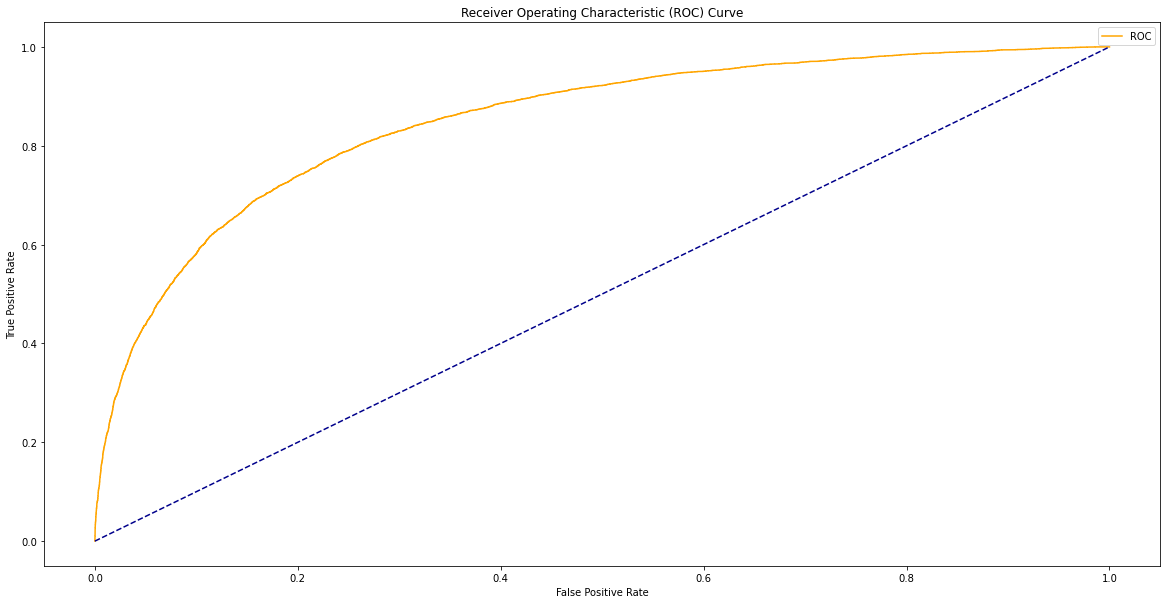

In [317]:
plot_roc_curve(fpr,tpr)

In [319]:
print('Roc auc score',roc_auc_score(y_test, final_pred3))

Roc auc score 0.8495091706631333


In [326]:
final_pred3A = final_pred3.copy()

In [327]:
final_pred3A.loc[final_pred3A[0] >=0.432852 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.432852 , 0] = 0

In [329]:
print("Accuracy:",accuracy_score(y_test, final_pred3A))
print("Precision:",precision_score(y_test, final_pred3A))
print("Recall:",recall_score(y_test, final_pred3A))

Accuracy: 0.7502139800285307
Precision: 0.46310715609936964
Recall: 0.8047680412371134


In [331]:
precision_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred3>thres,1,0)
    precision_ls.append(precision_score(y_test, y_pred))
    
precision_ls = pd.concat([pd.Series(thresolds), pd.Series(precision_ls)],
                        axis=1)
precision_ls.columns = ['thresolds', 'Precision']
precision_ls.sort_values(by='Precision', ascending=False, inplace=True)
precision_ls.head()

,thresolds,Precision
2,0.997454,1.000000
3,0.997447,1.000000
5,0.995758,0.980769
4,0.995789,0.980392
9,0.989820,0.979866


In [332]:
precision_ls.head(60)

,thresolds,Precision
2,0.997454,1.000000
3,0.997447,1.000000
5,0.995758,0.980769
4,0.995789,0.980392
9,0.989820,0.979866
8,0.989871,0.979730
11,0.989219,0.975000
10,0.989345,0.974843
13,0.988644,0.970238
12,0.988664,0.970060


In [344]:
precision_ls[2700:2750]

,thresolds,Precision
2700,0.653682,0.601584
2702,0.653601,0.601553
2704,0.653398,0.601521
2705,0.653229,0.601396
2706,0.653204,0.601303
2707,0.653035,0.601178
2708,0.652933,0.601085
2709,0.652751,0.600961
2711,0.652567,0.600930
2710,0.652700,0.600868


In [365]:
precision_ls[3850:3900]

,thresolds,Precision
3852,0.502318,0.502479
3854,0.502188,0.502478
3856,0.502136,0.502478
3844,0.502744,0.502428
3846,0.502734,0.502427
3857,0.501533,0.502153
3858,0.501498,0.502099
3859,0.501067,0.501828
3861,0.500892,0.501828
3862,0.500779,0.501828


In [407]:
final_pred3A = final_pred3.copy()

In [408]:
final_pred3A.loc[final_pred3A[0] >=0.498128 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.498128 , 0] = 0

In [409]:
print("Accuracy:",accuracy_score(y_test, final_pred3A))
print("Precision:",precision_score(y_test, final_pred3A))
print("Recall:",recall_score(y_test, final_pred3A))
print("f1 score:",f1_score(y_test, final_pred3A))
print("MCC score:",matthews_corrcoef(y_test, final_pred3A))

Accuracy: 0.7786019971469329
Precision: 0.5
Recall: 0.7545103092783505
f1 score: 0.6014381099126862
MCC score: 0.4752998101693703


In [373]:
final_pred3A.mean()

0    0.334094
dtype: float64

In [374]:
y_test.shape

(28040, 1)

In [376]:
y_test.mean()

RainTomorrow    0.221398
dtype: float64

In [377]:
from sklearn.utils import resample

In [387]:
x = pd.concat([x_test,y_test],axis=1)

In [388]:
df_minority = x.loc[x['RainTomorrow']==1]
df_majority = x.loc[x['RainTomorrow']==0]

In [389]:
df_majority.shape

(21832, 19)

In [390]:
df_minority.shape

(6208, 19)

In [391]:
df_majority_downsampled = resample(df_majority,      
                                 n_samples=5000,random_state = 0)

In [392]:
df_minority_downsampled = resample(df_minority,    
                                 n_samples=5000,random_state = 0)

In [393]:
x = pd.concat([df_majority_downsampled,df_minority_downsampled],axis=0)

In [394]:
x.shape

(10000, 19)

In [395]:
x['RainTomorrow'].mean()

0.5

In [396]:
x = x.reset_index(drop=True)

In [397]:
x_test2 = x.drop('RainTomorrow',axis=1)
y_test2 = x['RainTomorrow']

y_test2 = pd.DataFrame(y_test2)

In [398]:
lr.predict_proba(x_test2)
y_test_pred4 = lr.predict_proba(x_test2)[:,1]
final_pred3 = pd.DataFrame(y_test_pred4)
final_pred3.head()

,0
0,0.112048
1,0.389410
2,0.052644
3,0.591629
4,0.374985


In [399]:
final_pred3A = final_pred3.copy()

final_pred3A.loc[final_pred3A[0] >=0.498128 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.498128 , 0] = 0

print("Accuracy:",accuracy_score(y_test2, final_pred3A))
print("Precision:",precision_score(y_test2, final_pred3A))
print("Recall:",recall_score(y_test2, final_pred3A))

Accuracy: 0.774
Precision: 0.7821252059308073
Recall: 0.7596


In [348]:
y_test_pred5 = lr.predict_proba(x_test)[:,1]
y_test_pred5

array([0.08238898, 0.23696148, 0.87327356, ..., 0.02325532, 0.25903106,
       0.90572591])

In [349]:
final_pred5 = pd.DataFrame(y_test_pred5)
final_pred5.head()

,0
0,0.082389
1,0.236961
2,0.873274
3,0.709132
4,0.015849


In [350]:
y_test

,RainTomorrow
0,0
1,0
2,1
3,0
4,0
...,...
28035,1
28036,0
28037,0
28038,0


In [351]:
fpr , tpr , thresolds = roc_curve(y_test , final_pred5)
thresolds

array([1.99965317, 0.99965317, 0.99745401, ..., 0.01922881, 0.01919872,
       0.00211415])

In [352]:
recall_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred5>thres,1,0)
    recall_ls.append(recall_score(y_test, y_pred))
    
recall_ls = pd.concat([pd.Series(thresolds), pd.Series(recall_ls)],
                        axis=1)
recall_ls.columns = ['thresolds', 'recall']
recall_ls.sort_values(by='recall', ascending=False, inplace=True)
recall_ls.head()

,thresolds,recall
6521,0.002114,1.000000
6520,0.019199,0.999839
6519,0.019229,0.999839
6518,0.022872,0.999678
6517,0.022888,0.999678


In [354]:
recall_ls[2330:2370]

,thresolds,recall
4191,0.459635,0.785277
4190,0.459707,0.785116
4189,0.459763,0.785116
4188,0.460012,0.784955
4187,0.460070,0.784955
4186,0.461511,0.784794
4185,0.461529,0.784794
4183,0.461839,0.784633
4184,0.461760,0.784633
4182,0.461981,0.784472


In [357]:
recall_ls[2150:2200]

,thresolds,recall
4371,0.434100,0.803640
4370,0.434521,0.803479
4369,0.434525,0.803479
4368,0.435125,0.803318
4367,0.435157,0.803318
4366,0.435281,0.803157
4365,0.435344,0.803157
4364,0.435478,0.802996
4363,0.435524,0.802996
4361,0.435903,0.802835


In [358]:
final_pred5A  = final_pred5.copy()

In [359]:
final_pred5A.loc[final_pred5[0] >=0.439516 , 0] = 1
final_pred5A.loc[final_pred5[0] <=0.439516 , 0] = 0

In [360]:
print("Accuracy:",accuracy_score(y_test, final_pred5A))
print("Precision:",precision_score(y_test, final_pred5A))
print("Recall:",recall_score(y_test, final_pred5A))

Accuracy: 0.7534593437945791
Precision: 0.46686718676567346
Recall: 0.8000966494845361


In [58]:
print('Roc auc score',roc_auc_score(y_test, final_pred5A))

Roc auc score 0.8546015312127808


In [400]:
lr.predict_proba(x_test2)
y_test_pred4 = lr.predict_proba(x_test2)[:,1]
final_pred3 = pd.DataFrame(y_test_pred4)
final_pred3.head()

final_pred3A = final_pred3.copy()

final_pred3A.loc[final_pred3A[0] >=0.439516 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.439516 , 0] = 0

print("Accuracy:",accuracy_score(y_test2, final_pred3A))
print("Precision:",precision_score(y_test2, final_pred3A))
print("Recall:",recall_score(y_test2, final_pred3A))

Accuracy: 0.7719
Precision: 0.7554010896111215
Recall: 0.8042


In [402]:
print("f1 score:",f1_score(y_test2, final_pred3A))
print("MCC score:",matthews_corrcoef(y_test2, final_pred3A))

f1 score: 0.7790371016177468
MCC score: 0.544938246007552
